In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np

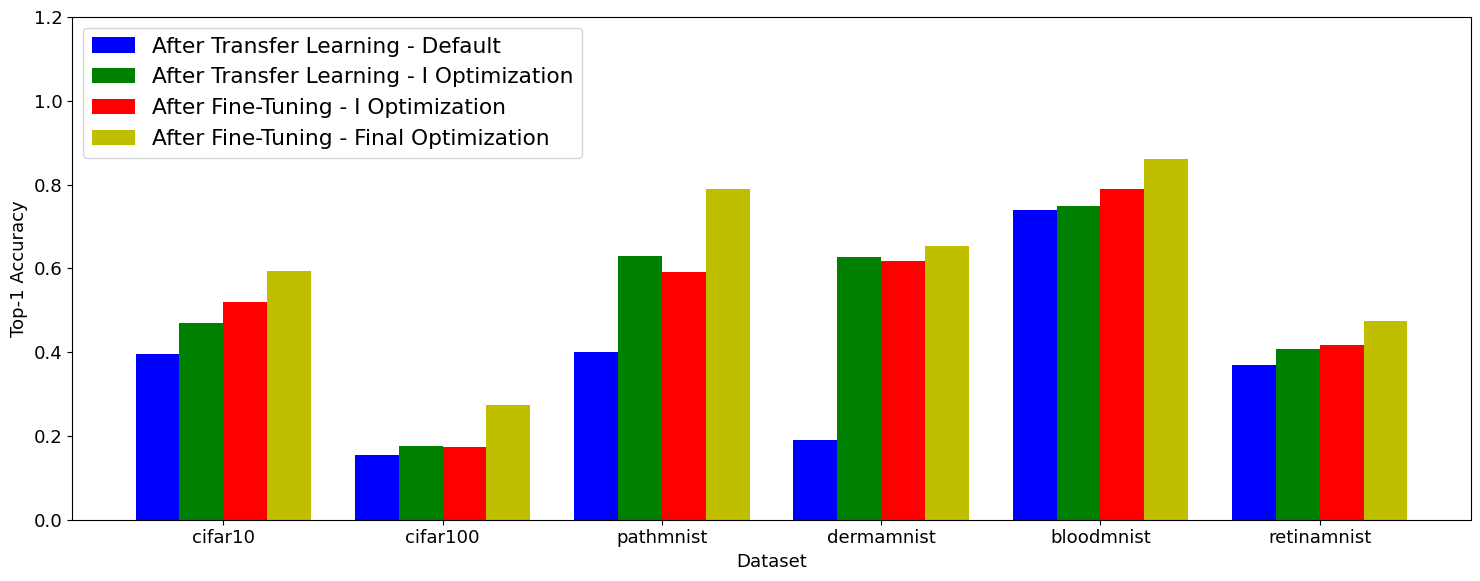

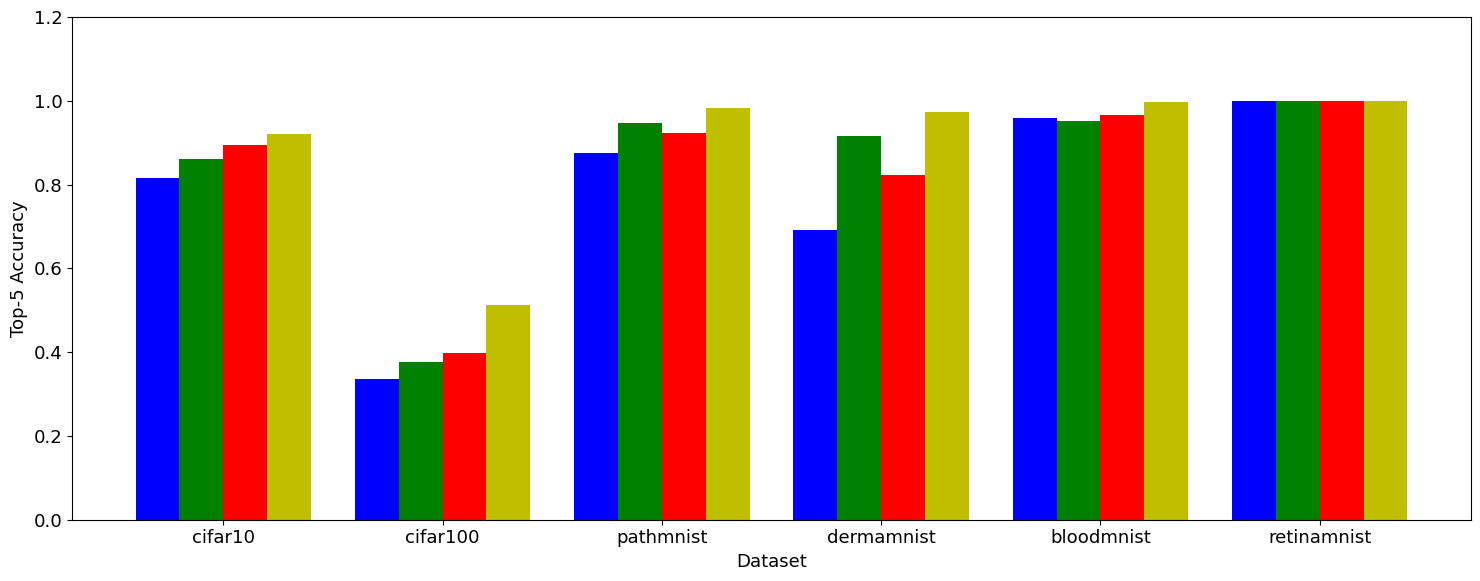

In [5]:
with open("CAS Results/pipeline_optimization.json", 'r') as jsonFile:
    data = json.load(jsonFile)

plt.rcParams.update({'font.size': 13})

# Estraiamo i nomi dei dataset
datasets = list(data.keys())

# Estraiamo i valori dei top 1 e top 5 per emb e dif
top_1_emb_no_opt = [data[dataset]["After Transfer Learning"]["no_opt"]["top_1"] for dataset in datasets]
top_1_emb_opt = [data[dataset]["After Transfer Learning"]["opt"]["top_1"] for dataset in datasets]
top_1_dif_no_opt = [data[dataset]["After Fine-Tuning"]["no_opt"]["top_1"] for dataset in datasets]
top_1_dif_opt = [data[dataset]["After Fine-Tuning"]["opt"]["top_1"] for dataset in datasets]

top_5_emb_no_opt = [data[dataset]["After Transfer Learning"]["no_opt"]["top_5"] for dataset in datasets]
top_5_emb_opt = [data[dataset]["After Transfer Learning"]["opt"]["top_5"] for dataset in datasets]
top_5_dif_no_opt = [data[dataset]["After Fine-Tuning"]["no_opt"]["top_5"] for dataset in datasets]
top_5_dif_opt = [data[dataset]["After Fine-Tuning"]["opt"]["top_5"] for dataset in datasets]

# Plot dei risultati per top 1
plt.figure(figsize=(15, 6))
bar_width = 0.2
index = np.arange(len(datasets))

plt.bar(index, top_1_emb_no_opt, bar_width, label='After Transfer Learning - Default', color='b')
plt.bar(index + bar_width, top_1_emb_opt, bar_width, label='After Transfer Learning - I Optimization', color='g')
plt.bar(index + 2 * bar_width, top_1_dif_no_opt, bar_width, label='After Fine-Tuning - I Optimization', color='r')
plt.bar(index + 3 * bar_width, top_1_dif_opt, bar_width, label='After Fine-Tuning - Final Optimization', color='y')

plt.xlabel('Dataset')
plt.ylabel('Top-1 Accuracy')
plt.xticks(index + 1.5 * bar_width, datasets)
plt.ylim(0,1.2)
plt.legend(loc='upper left', fontsize='large')
plt.tight_layout()
plt.savefig("optimization_plots/top_1.png")

# Plot dei risultati per top 5
plt.figure(figsize=(15, 6))
plt.bar(index, top_5_emb_no_opt, bar_width, label='After Transfer Learning - Default', color='b')
plt.bar(index + bar_width, top_5_emb_opt, bar_width, label='After Transfer Learning - I Optimization', color='g')
plt.bar(index + 2 * bar_width, top_5_dif_no_opt, bar_width, label='After Fine-Tuning - I Optimization', color='r')
plt.bar(index + 3 * bar_width, top_5_dif_opt, bar_width, label='After Fine-Tuning - Final Optimization', color='y')

plt.xlabel('Dataset')
plt.ylabel('Top-5 Accuracy')
plt.xticks(index + 1.5 * bar_width, datasets)
plt.ylim(0,1.2)
plt.tight_layout()

plt.savefig("optimization_plots/top_5.png")

plt.show()


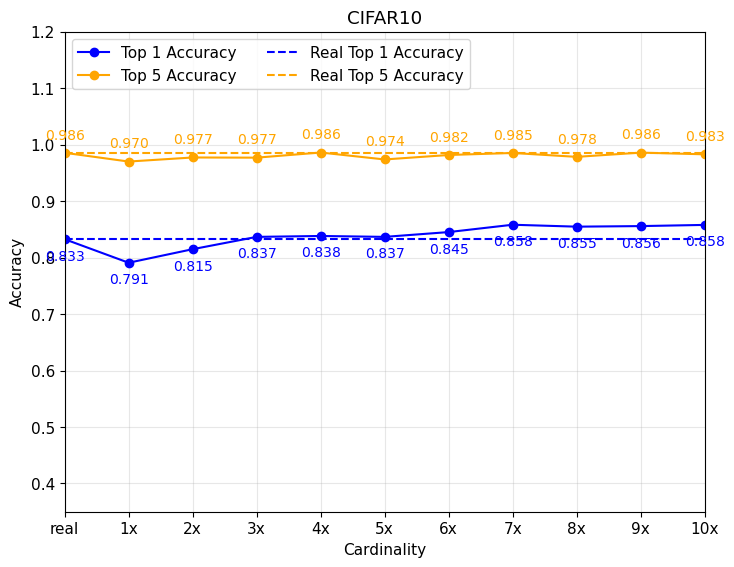

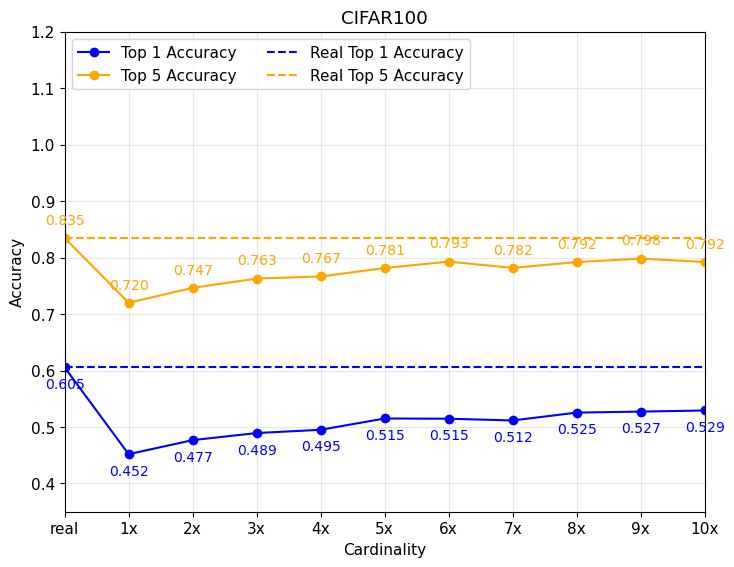

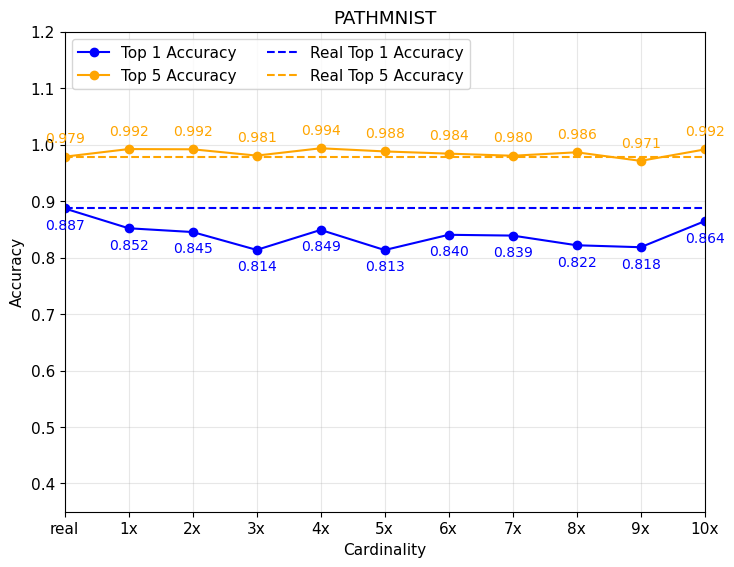

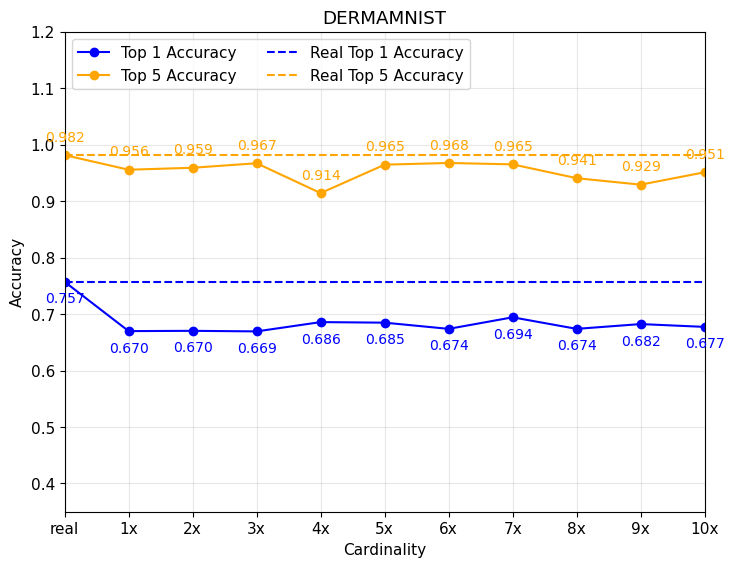

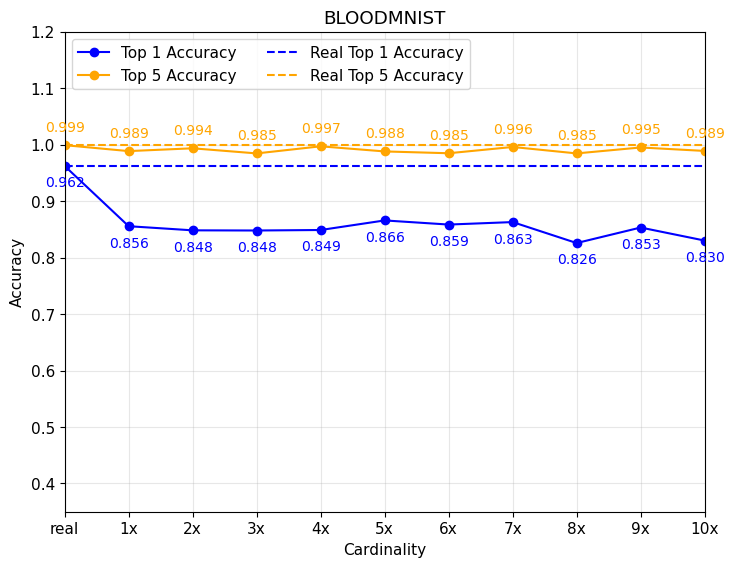

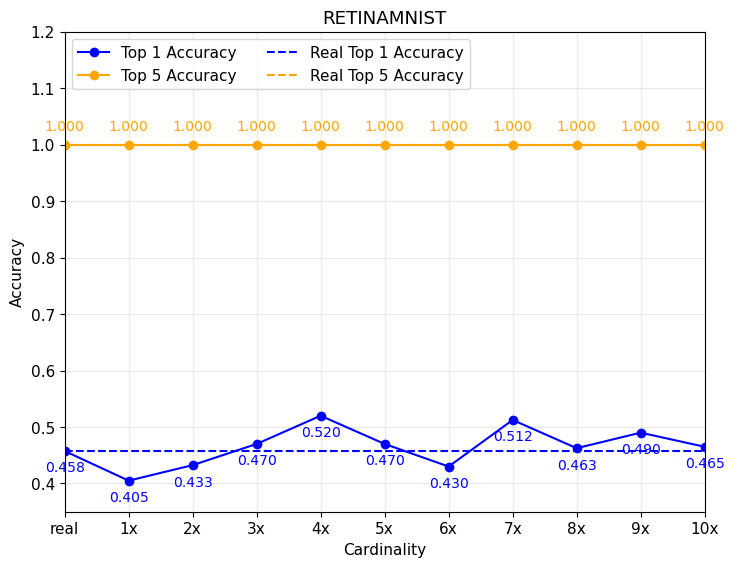

In [4]:
plt.rcParams.update({'font.size': 11})
with open("CAS Results/test_accuracies.json", 'r') as f:
    results = json.load(f)
    
dss = ['cifar10','cifar100','pathmnist', 'dermamnist', 'bloodmnist', 'retinamnist']
# Data
for ds in dss:
    data = results["resnet20"][ds]
    
    # Extract x values
    x_values = list(data.keys())
    ticks = ["real"] + [i[1:] + "x" for i in x_values[1:]]
    
    # Extract y values
    y_top1_values = [data[x]["top_1_accuracy"] for x in x_values]
    y_top5_values = [data[x]["top_5_accuracy"] for x in x_values]
    
    # Create a line plot
    plt.plot(x_values, y_top1_values, label='Top 1 Accuracy', marker='o', color='blue')
    plt.plot(x_values, y_top5_values, label='Top 5 Accuracy', marker='o', color='orange')
    
    for x, y1, y5 in zip(x_values, y_top1_values, y_top5_values):
        plt.annotate(f'{y1:.3f}', (x, y1), textcoords="offset points", xytext=(0, -15), ha='center', color='blue',fontsize=10)
        plt.annotate(f'{y5:.3f}', (x, y5), textcoords="offset points", xytext=(0, 10), ha='center', color='orange',fontsize=10)
    
    plt.axhline(y=data['real']['top_1_accuracy'], color='blue', linestyle='--', label='Real Top 1 Accuracy')
    plt.axhline(y=data['real']['top_5_accuracy'], color='orange', linestyle='--', label='Real Top 5 Accuracy')
    
    # Add labels and legend
    plt.xticks(x_values,ticks)
    plt.xlabel('Cardinality')
    plt.ylabel('Accuracy')
    plt.ylim(0.35,1.2)
    plt.title(ds.upper())
    plt.legend(loc='upper left',ncol=2)
    plt.grid(alpha=0.3)
    
    # Uncomment to save
    # plt.savefig(f"CAS Results/CAS_plots/{ds}.png", bbox_inches = 'tight', pad_inches = 0.05)
    
    plt.tight_layout()
    
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    plt.margins(0,0)
    # Show the plot
    plt.show()
